# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
data = pd.read_csv('/kaggle/input/bitcoin-prediction-dataset-bullrun/BTC_USD_Price_Prediction_Data.csv')

In [3]:
data.head()

,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,0,BTC,2014-03-14,124.65499,125.30466,125.75166,123.56349
1,1,BTC,2014-03-15,126.45500,124.65499,126.75850,124.63383
2,2,BTC,2014-03-16,109.58483,126.45500,126.66566,84.32833
3,3,BTC,2014-03-17,119.67466,109.58483,119.67500,108.05816
4,4,BTC,2014-03-18,122.33866,119.67466,122.93633,119.00566


In [4]:
data.tail()

,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2782,2782,BTC,2021-10-25,49765.132082,49597.778891,51449.798576,46295.720180
2783,2783,BTC,2021-10-26,50033.693137,49718.354353,51579.312545,48945.346536
2784,2784,BTC,2021-10-27,47886.625255,49927.035067,50691.802950,47006.102292
2785,2785,BTC,2021-10-28,45605.615754,46806.537852,49671.414174,43869.638969
2786,2786,BTC,2021-10-29,43145.471291,46440.336570,46623.853437,42103.346430


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2787 non-null   int64  
 1   Currency             2787 non-null   object 
 2   Date                 2787 non-null   object 
 3   Closing Price (USD)  2787 non-null   float64
 4   24h Open (USD)       2787 non-null   float64
 5   24h High (USD)       2787 non-null   float64
 6   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 152.5+ KB


In [6]:
data.describe()

,Unnamed: 0,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,1393.000000,6530.845141,6514.579485,6711.061683,6303.417386
std,804.681925,10887.847444,10863.800772,11206.779756,10475.811252
min,0.000000,109.584830,109.584830,119.675000,84.328330
25%,696.500000,461.087500,460.400500,470.720995,451.818830
50%,1393.000000,2781.182500,2773.367500,2875.696250,2697.457500
75%,2089.500000,8507.923720,8497.887593,8764.291985,8222.060570
max,2786.000000,63347.789035,63563.673545,64802.787870,62095.632914


In [7]:
data.shape

(2787, 7)

# Preprocessing Data

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace= True)

In [9]:
data.shape

(2787, 6)

In [10]:
num_cols = 1
dataset = data[r"Closing Price (USD)"]
dataset = pd.DataFrame(dataset)
df = dataset.values

In [11]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(df))

In [12]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2090 Test Size : 697


In [13]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2090, 1)

In [14]:
x_train = []
y_train = []
time_steps = 60
num_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :num_cols])
    y_train.append(train_data[i, :num_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.00023831],
       [0.00026677],
       [0.        ],
       [0.00015955],
       [0.00020168],
       [0.00019087],
       [0.0002089 ],
       [0.00022847],
       [0.00024454],
       [0.00027478],
       [0.000264  ],
       [0.00027424],
       [0.00028145],
       [0.00042154],
       [0.0003893 ],
       [0.00054047],
       [0.00046394],
       [0.00054345],
       [0.00069526],
       [0.0008184 ],
       [0.00088127],
       [0.00109188],
       [0.00126051],
       [0.00145666],
       [0.00113492],
       [0.00105074],
       [0.00109288],
       [0.00124252],
       [0.00133103],
       [0.00140445],
       [0.00138271],
       [0.00141471],
       [0.00142869],
       [0.00145416],
       [0.00160856],
       [0.00184122],
       [0.00220861],
       [0.00243115],
       [0.00293971],
       [0.00351873],
       [0.00280373],
       [0.00310564],
       [0.00362996],
       [0.00393584],
       [0.00465493],
       [0.00475217],
       [0.0049279 ],
  

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], num_cols))

In [17]:
x_train.shape , y_train.shape

((2030, 60, 1), (2030, 1))

In [18]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], num_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(num_cols)
])

model.compile(optimizer= 'adam', loss= 'mse')

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train, y_train, epochs= 50, batch_size= 32)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.0935e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.7088e-05
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0262e-04
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8461e-05
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4844e-05
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7821e-05
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1031e-05
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5295e-05
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1867e-05
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7431e-05
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1784e-05
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5350e-05
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7535e-05
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2719e-05
Epoch 15/50
64/64 ━━━━━━━━━━

# Model Evaluation

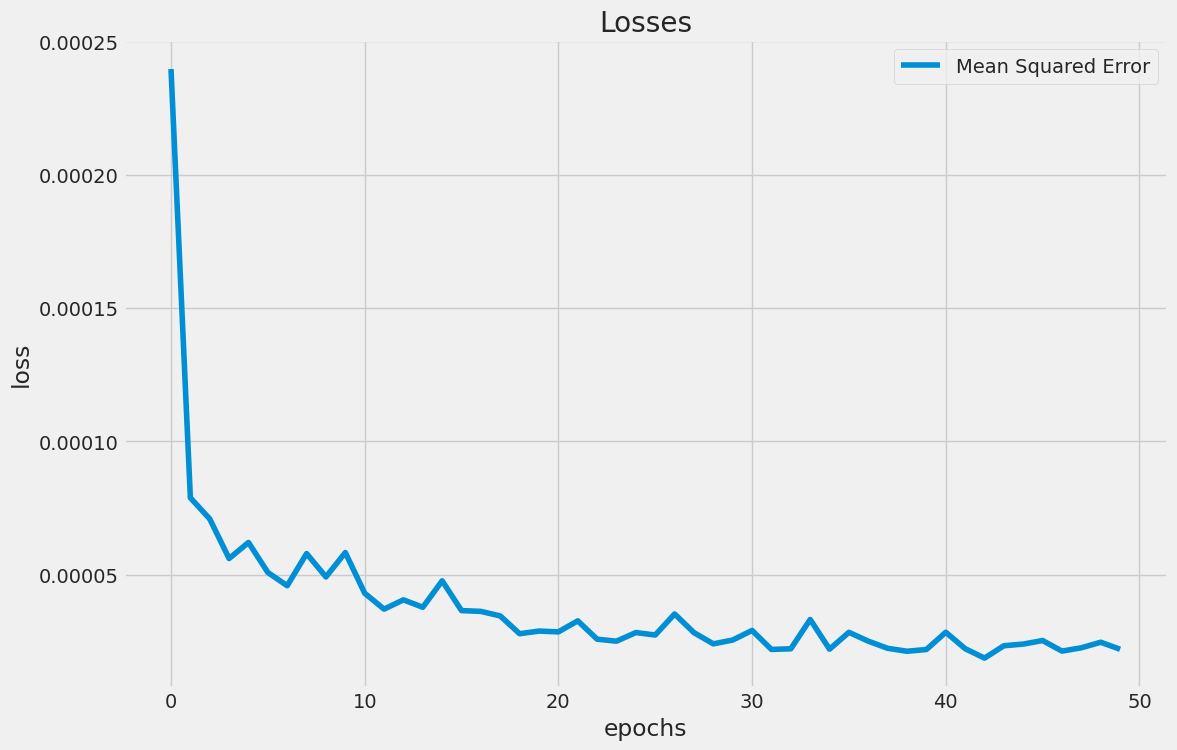

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

In [22]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
num_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:num_cols])
    y_test.append(test_data[i, 0:num_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], num_cols))

In [23]:
x_test.shape , y_test.shape

((697, 60, 1), (697, 1))

In [24]:
predictions = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [25]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(697, 1)

In [26]:
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

491.95

In [27]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,10087.436523,9907.407965
1,10454.896484,10462.412169
2,11001.828125,10844.570975
3,11432.762695,10997.459750
4,11625.045898,11666.409684
...,...,...
692,51530.828125,49765.132082
693,49027.542969,50033.693137
694,49785.250000,47886.625255
695,47832.792969,45605.615754


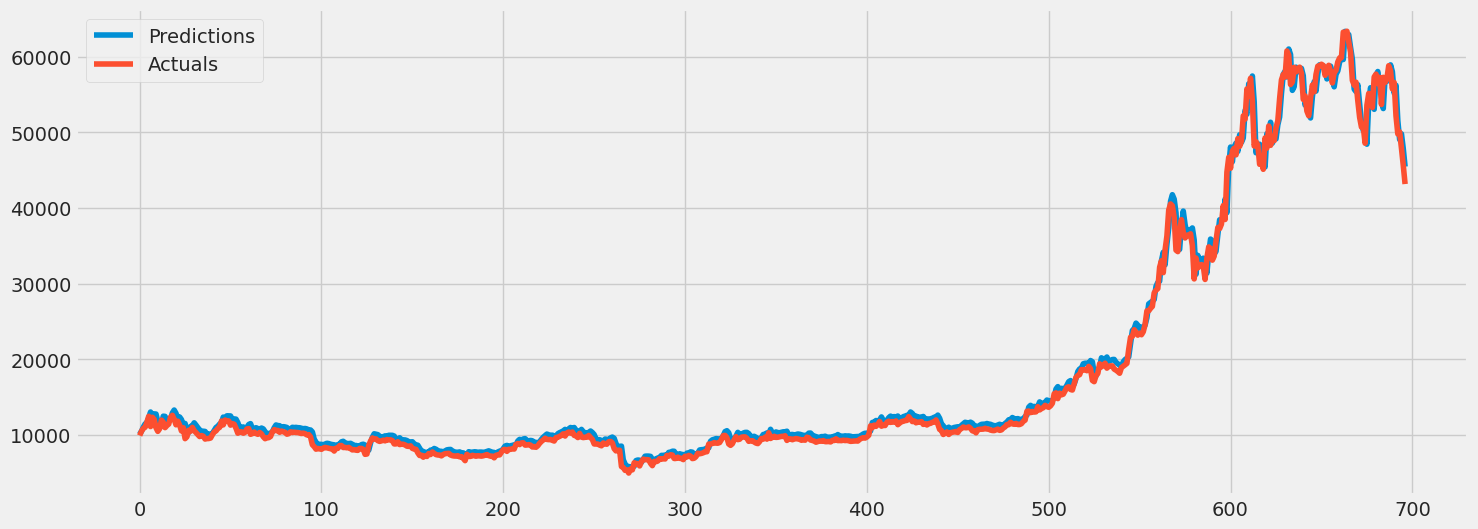

In [28]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()